<a href="https://colab.research.google.com/github/Daham-abeyratne/Customer_Churn_Prediction/blob/main/costomer_churn_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
!mkdir Customer_Churn_Prediction
%cd Customer_Churn_Prediction


mkdir: cannot create directory ‘Customer_Churn_Prediction’: File exists
/content/Customer_Churn_Prediction


In [10]:
!ls

In [3]:
!git init
!git config --global user.email "dahamabeyratney@gmail.com"
!git config --global user.name "Daham-Abeyratne"


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/


In [15]:
pip install --upgrade scikit-learn

In [16]:
pip install --upgrade imbalanced-learn

# **Import Data**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
telco_data = pd.read_csv('/content/drive/MyDrive/ML_CW/Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis (EDA)**

In [19]:
print("Rows: ", telco_data.shape[0])
print("Columns: ", telco_data.shape[1])

Rows:  7043
Columns:  21


In [20]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [21]:
print("Stats")
print(telco_data.describe())

Stats
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [22]:
telco_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


the totalCharges should be numeric but it is in object format

In [23]:
print("Statistics")
telco_data.describe()

Statistics


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
print("Missing Values")
print(telco_data.isnull().sum())

Missing Values
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [25]:
print("Duplicate Values")
print(telco_data.duplicated().sum())

Duplicate Values
0


In [26]:
print("Target Variable")
print(telco_data['Churn'].value_counts())

print("\nPercentage of Target Variable:")
print((telco_data['Churn'].value_counts()/telco_data.shape[0]*100).round(2))

Target Variable
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Percentage of Target Variable:
Churn
No     73.46
Yes    26.54
Name: count, dtype: float64


In [27]:
print("Unique Values")
categories = telco_data.select_dtypes(include=['object']).columns
categories = categories.drop('customerID')
for col in categories:
  print(f"{col}: {telco_data[col].nunique()} unique values")
  print(f"{telco_data[col].unique()}\n")

Unique Values
gender: 2 unique values
['Female' 'Male']

Partner: 2 unique values
['Yes' 'No']

Dependents: 2 unique values
['No' 'Yes']

PhoneService: 2 unique values
['No' 'Yes']

MultipleLines: 3 unique values
['No phone service' 'No' 'Yes']

InternetService: 3 unique values
['DSL' 'Fiber optic' 'No']

OnlineSecurity: 3 unique values
['No' 'Yes' 'No internet service']

OnlineBackup: 3 unique values
['Yes' 'No' 'No internet service']

DeviceProtection: 3 unique values
['No' 'Yes' 'No internet service']

TechSupport: 3 unique values
['No' 'Yes' 'No internet service']

StreamingTV: 3 unique values
['No' 'Yes' 'No internet service']

StreamingMovies: 3 unique values
['No' 'Yes' 'No internet service']

Contract: 3 unique values
['Month-to-month' 'One year' 'Two year']

PaperlessBilling: 2 unique values
['Yes' 'No']

PaymentMethod: 4 unique values
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

TotalCharges: 6531 unique values
['29.85' '1889.5' 

In [28]:
for col in categories:
  unkown =(telco_data[col] == ' ').sum()
  print(f"{col}: {unkown} unkown values")

gender: 0 unkown values
Partner: 0 unkown values
Dependents: 0 unkown values
PhoneService: 0 unkown values
MultipleLines: 0 unkown values
InternetService: 0 unkown values
OnlineSecurity: 0 unkown values
OnlineBackup: 0 unkown values
DeviceProtection: 0 unkown values
TechSupport: 0 unkown values
StreamingTV: 0 unkown values
StreamingMovies: 0 unkown values
Contract: 0 unkown values
PaperlessBilling: 0 unkown values
PaymentMethod: 0 unkown values
TotalCharges: 11 unkown values
Churn: 0 unkown values


# **Visualization**

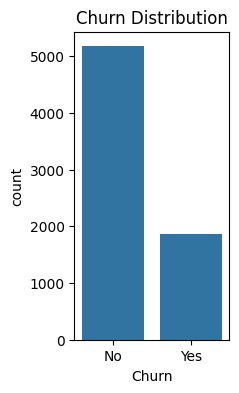

In [29]:
plt.figure(figsize=(2,4))
sns.countplot(data=telco_data, x='Churn')
plt.title('Churn Distribution')
plt.show()

In [30]:
num_cols = ['tenure', 'MonthlyCharges']

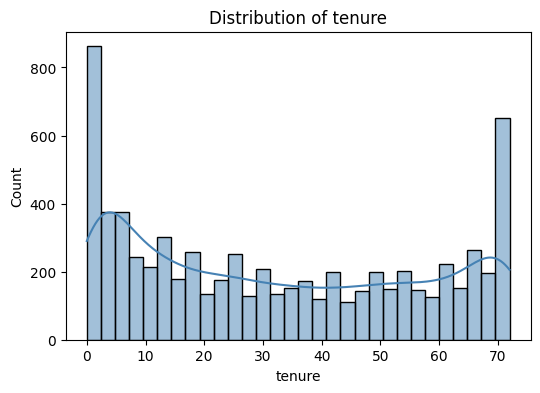

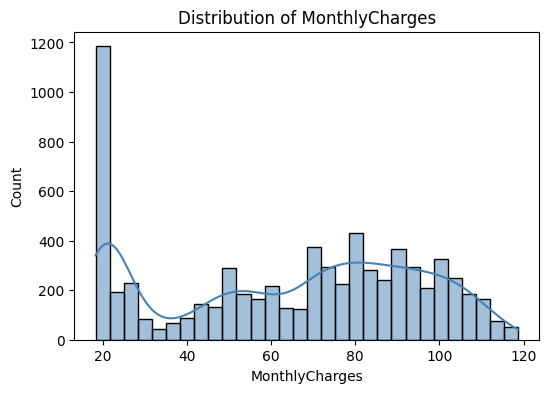

In [31]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(telco_data[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.show()

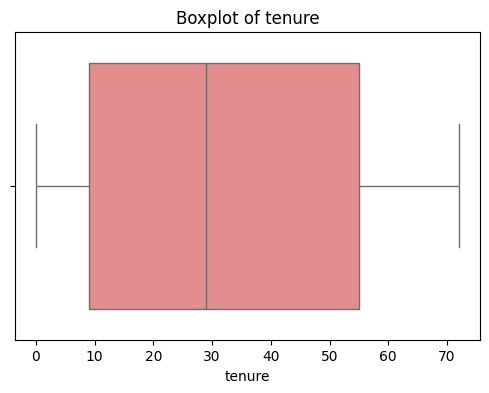

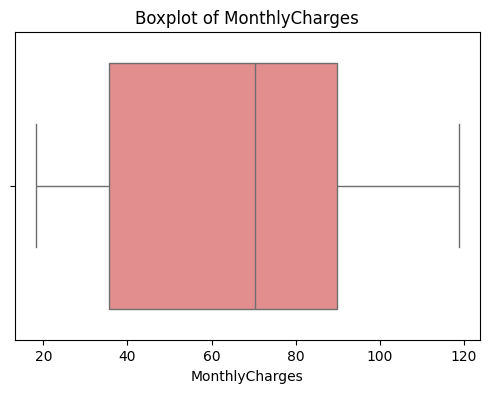

In [32]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=telco_data[col], color='lightcoral')
    plt.title(f"Boxplot of {col}")
    plt.show()

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


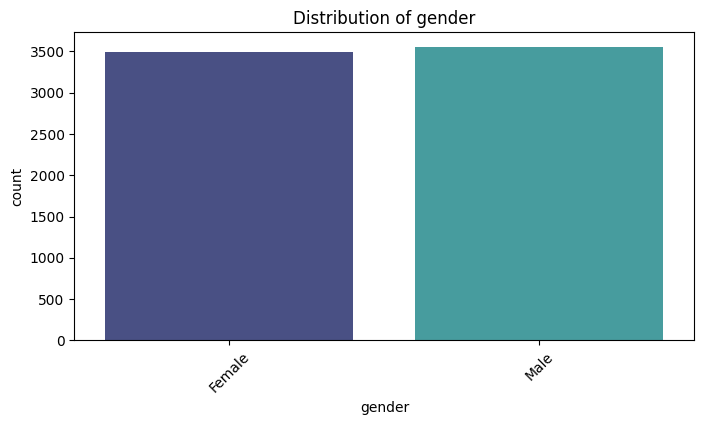

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


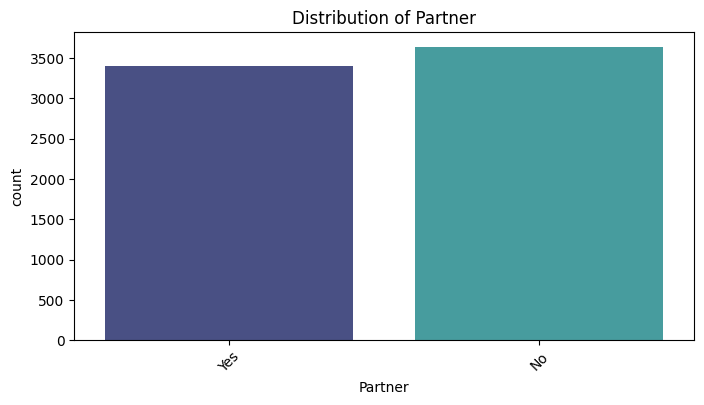

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


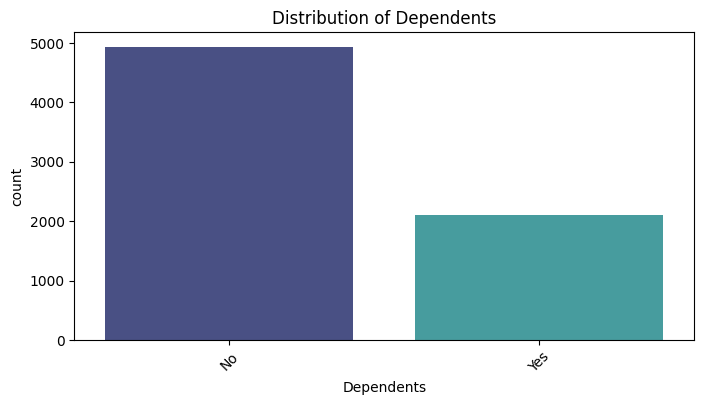

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


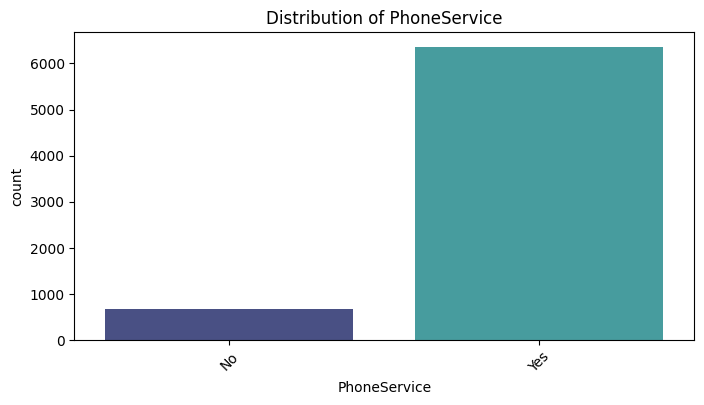

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


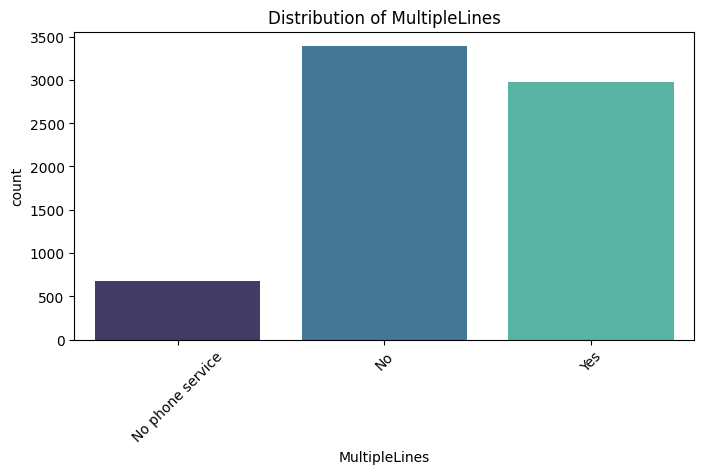

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


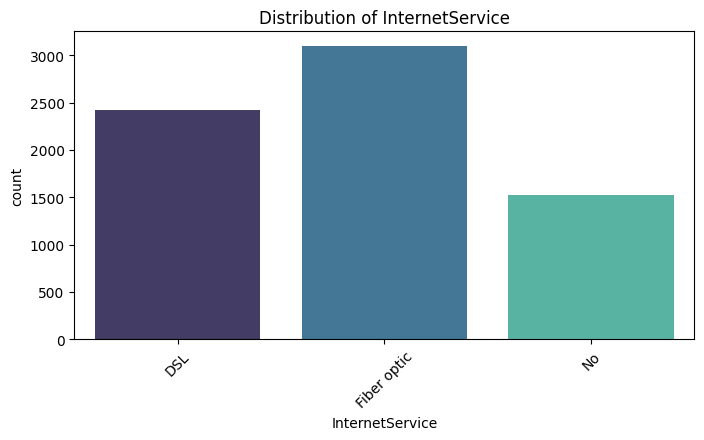

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


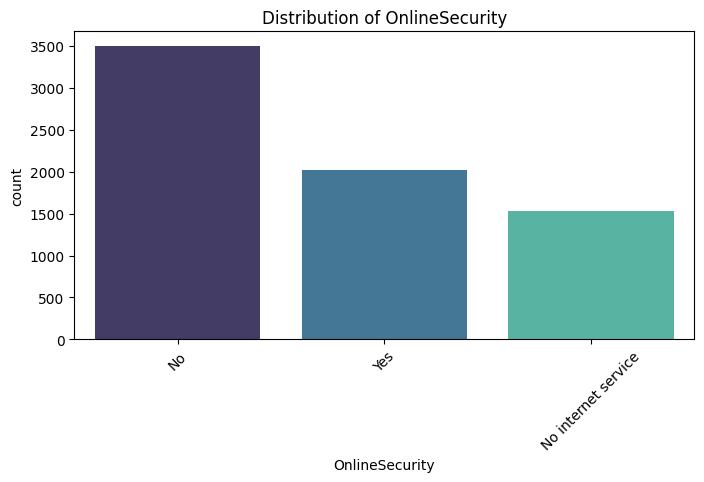

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


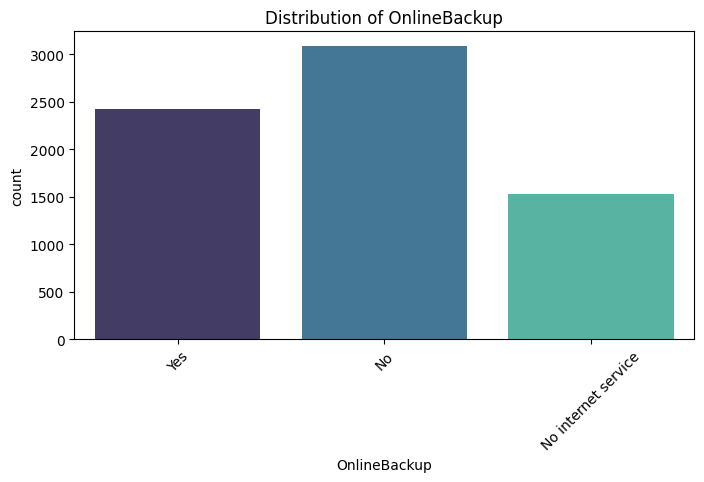

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


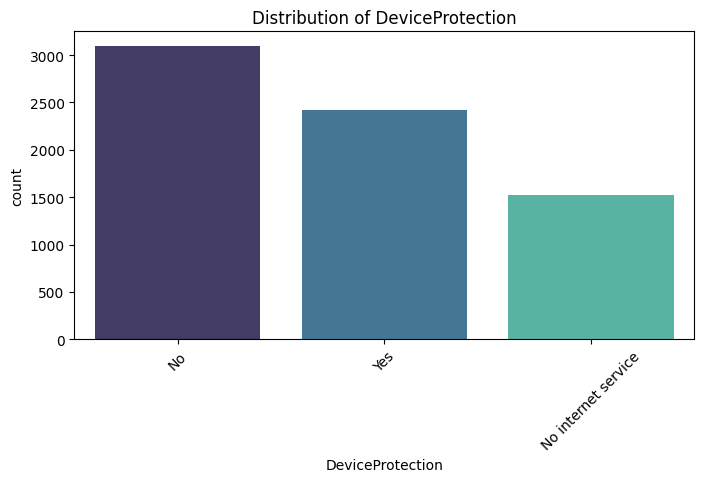

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


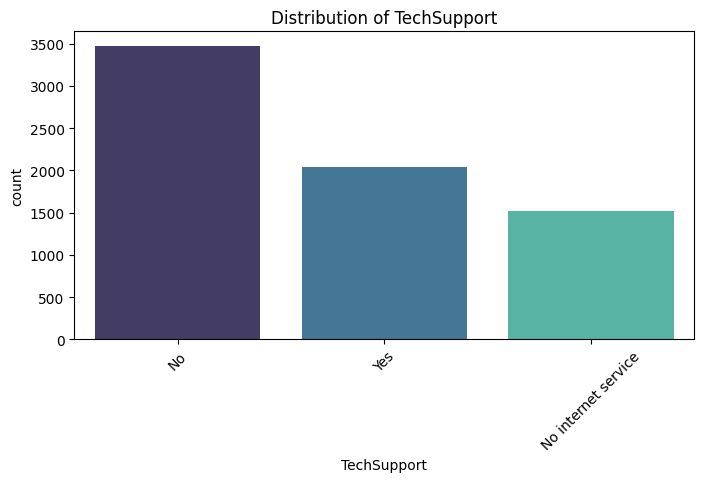

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


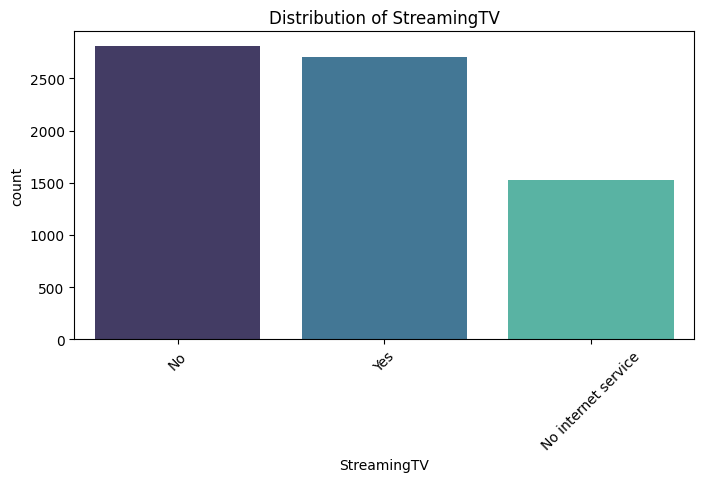

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


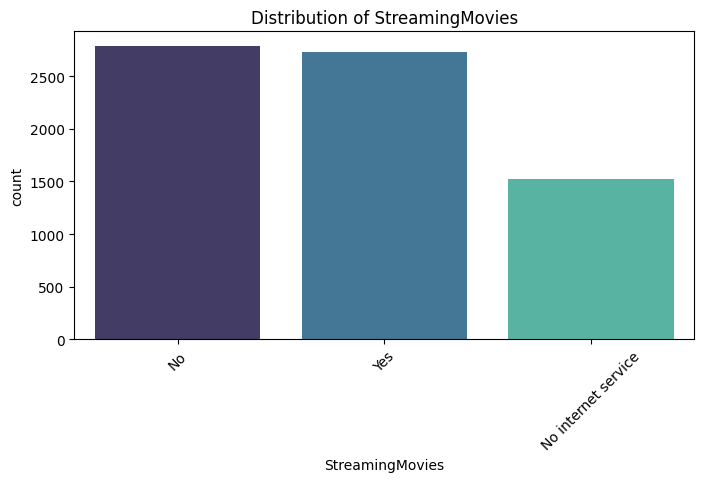

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


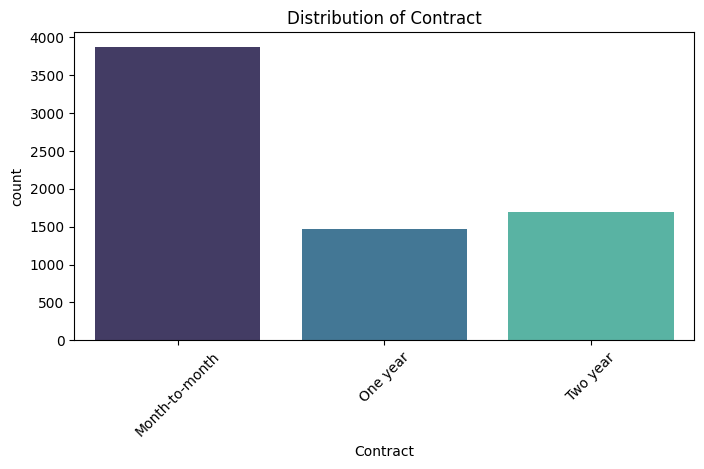

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


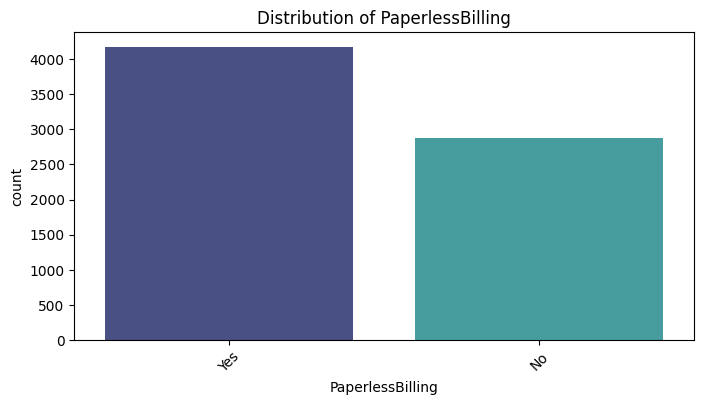

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


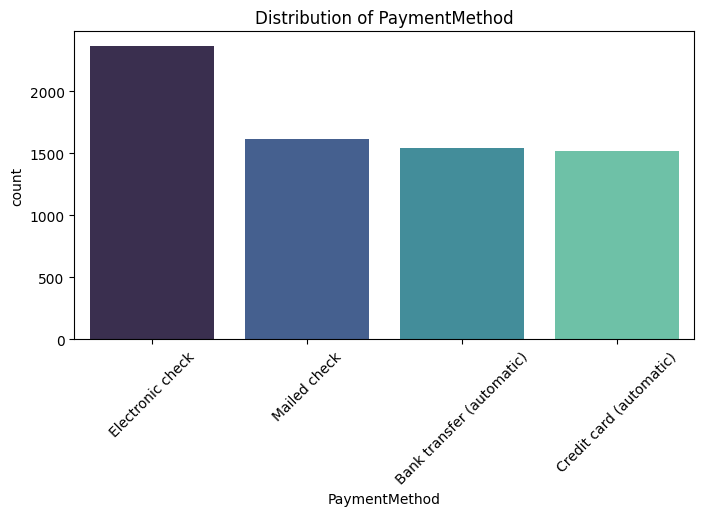

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


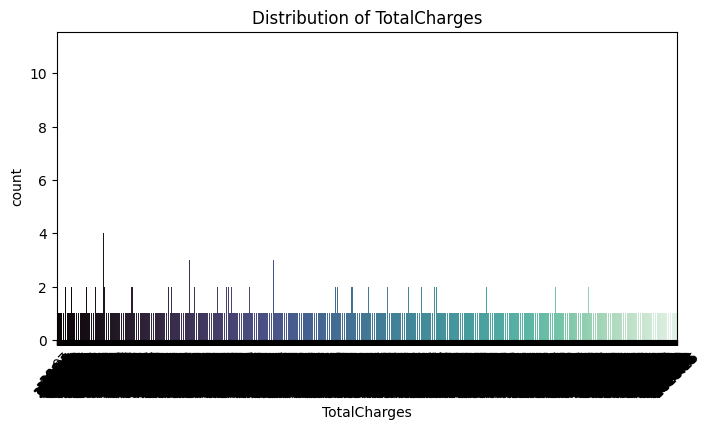

/tmp/ipython-input-2261741626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=telco_data, x=col, palette='mako')


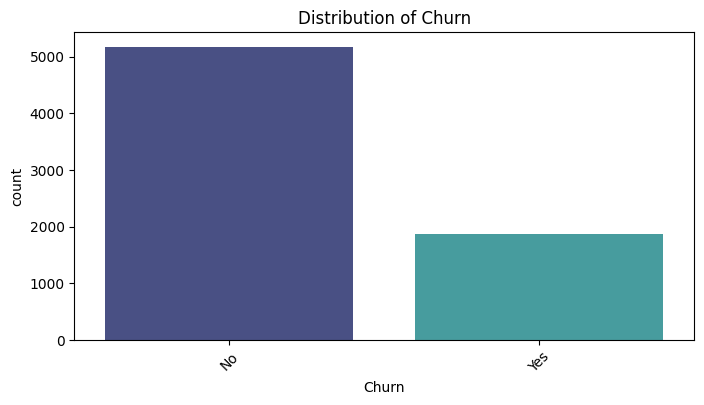

In [34]:
for col in categories:
    plt.figure(figsize=(8,4))
    sns.countplot(data=telco_data, x=col, palette='mako')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()
